In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import time
import tracemalloc  
import pandas as pd

letter_recognition = fetch_ucirepo(id=59)
X = letter_recognition.data.features
y = letter_recognition.data.targets.values.ravel()

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train_full[:2000]
y_train = y_train_full[:2000]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
start_time = time.time()
tracemalloc.start()

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

preds = knn.predict(X_test_scaled)
acc = accuracy_score(y_test, preds)

current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

print("k-NN Accuracy:", acc)
print("Inference Time: %.2f seconds" % (time.time() - start_time))
print("Memory Usage: %.2f MB" % (peak / 10**6))


k-NN Accuracy: 0.81825
Inference Time: 0.69 seconds
Memory Usage: 1.19 MB


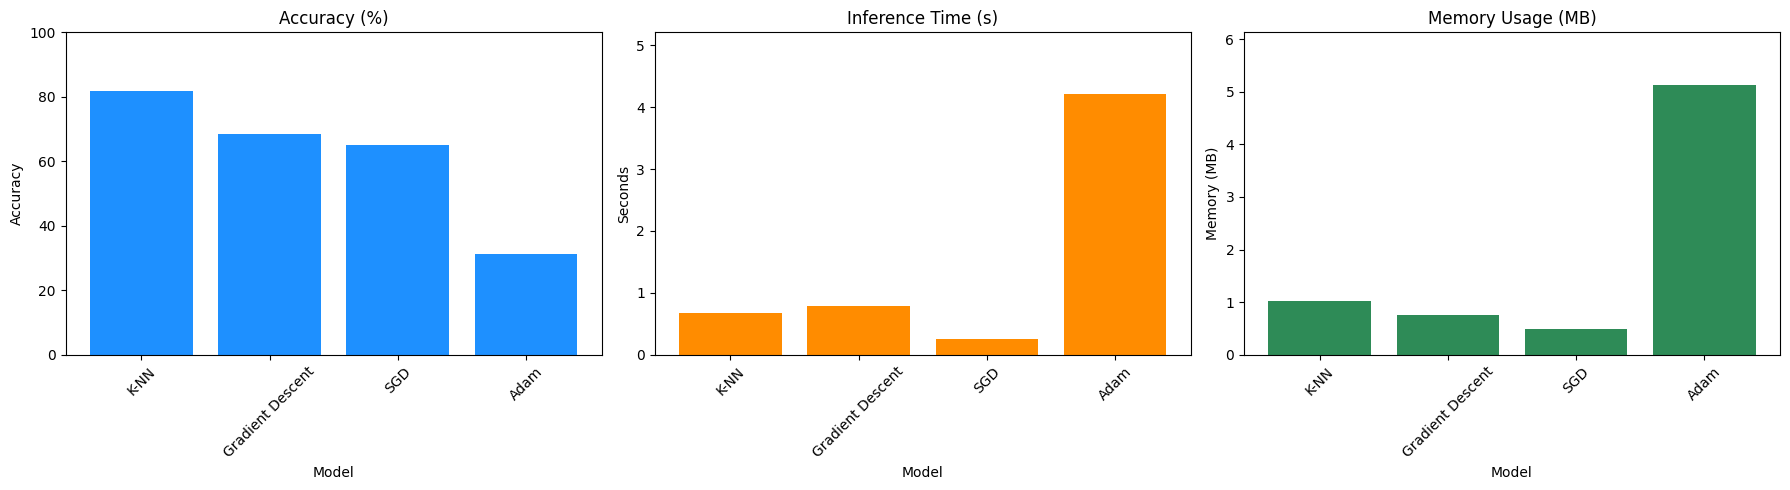

In [3]:
import matplotlib.pyplot as plt

# Re-defining the data since it's a new code cell
models = ['K-NN', 'Gradient Descent', 'SGD', 'Adam']
accuracy = [81.83, 68.38, 65.10, 31.28]
inference_time = [0.68, 0.78, 0.26, 4.21]
memory_usage = [1.03, 0.76, 0.49, 5.13]

# Create subplots for each metric
fig, axs = plt.subplots(1, 3, figsize=(18, 5), dpi=100)

# Plot Accuracy
axs[0].bar(models, accuracy, color='dodgerblue')
axs[0].set_title('Accuracy (%)')
axs[0].set_ylabel('Accuracy')
axs[0].set_ylim(0, 100)

# Plot Inference Time
axs[1].bar(models, inference_time, color='darkorange')
axs[1].set_title('Inference Time (s)')
axs[1].set_ylabel('Seconds')
axs[1].set_ylim(0, max(inference_time) + 1)

# Plot Memory Usage
axs[2].bar(models, memory_usage, color='seagreen')
axs[2].set_title('Memory Usage (MB)')
axs[2].set_ylabel('Memory (MB)')
axs[2].set_ylim(0, max(memory_usage) + 1)

# Styling
for ax in axs:
    ax.set_xlabel('Model')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import time
import tracemalloc

gd_model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, max_iter=1, warm_start=True, shuffle=False)

start_time = time.time()
tracemalloc.start()

for epoch in range(10): 
    gd_model.fit(X_train_scaled, y_train)

current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

gd_preds = gd_model.predict(X_test_scaled)
print("Gradient Descent Accuracy:", accuracy_score(y_test, gd_preds))
print("Inference Time: %.2f seconds" % (time.time() - start_time))
print("Memory Usage: %.2f MB" % (peak / 10**6))


c:\users\jetwi\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\users\jetwi\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\users\jetwi\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\users\jetwi\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\users\jetwi\anaconda3\lib\site-packages\sklearn\linear_mo

Gradient Descent Accuracy: 0.68375
Inference Time: 0.76 seconds
Memory Usage: 0.57 MB


c:\users\jetwi\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [26]:
sgd_model = SGDClassifier(loss='log_loss', learning_rate='optimal', max_iter=1000)

start_time = time.time()
tracemalloc.start()

sgd_model.fit(X_train_scaled, y_train)

current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

sgd_preds = sgd_model.predict(X_test_scaled)
print("Stochastic Gradient Descent Accuracy:", accuracy_score(y_test, sgd_preds))
print("Inference Time: %.2f seconds" % (time.time() - start_time))
print("Memory Usage: %.2f MB" % (peak / 10**6))

Stochastic Gradient Descent Accuracy: 0.62825
Inference Time: 0.24 seconds
Memory Usage: 0.49 MB


In [25]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import time
import tracemalloc

batch_size = 16
n_epochs = 1 
n_samples = X_train_scaled.shape[0]

X_train_mini = X_train_scaled[:2000]
y_train_mini = y_train[:2000]
n_batches = int(np.ceil(len(X_train_mini) / batch_size))

sgd_model = SGDClassifier(loss='log_loss', learning_rate='optimal')
start_time = time.time()
tracemalloc.start()
indices = np.random.permutation(len(X_train_mini))  
X_shuffled = X_train_mini[indices]
y_shuffled = y_train_mini[indices]

for i in range(n_batches):
    start = i * batch_size
    end = min(start + batch_size, len(X_train_mini))
    X_batch = X_shuffled[start:end]
    y_batch = y_shuffled[start:end]

    if i == 0:
        sgd_model.partial_fit(X_batch, y_batch, classes=np.unique(y_train))
    else:
        sgd_model.partial_fit(X_batch, y_batch)

current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

sgd_preds = sgd_model.predict(X_test_scaled)
print("Mini-Batch SGD (1 Epoch) Accuracy:", accuracy_score(y_test, sgd_preds))
print("Inference Time: %.2f seconds" % (time.time() - start_time))
print("Memory Usage: %.2f MB" % (peak / 10**6))


Mini-Batch SGD (1 Epoch) Accuracy: 0.4975
Inference Time: 9.42 seconds
Memory Usage: 0.74 MB


In [ ]:
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

y_train_cat = to_categorical(y_train_enc)
y_test_cat = to_categorical(y_test_enc)

model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(26, activation='softmax')  
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
tracemalloc.start()

model.fit(X_train_scaled, y_train_cat, epochs=1, batch_size=16, shuffle=True, verbose=0)  

loss, acc = model.evaluate(X_test_scaled, to_categorical(y_test_enc), verbose=0)

current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

print("Adam NN Accuracy:", acc)
print("Inference Time: %.2f seconds" % (time.time() - start_time))
print("Memory Usage: %.2f MB" % (peak / 10**6))


Adam NN Accuracy: 0.3127500116825104
Inference Time: 4.21 seconds
Memory Usage: 5.13 MB


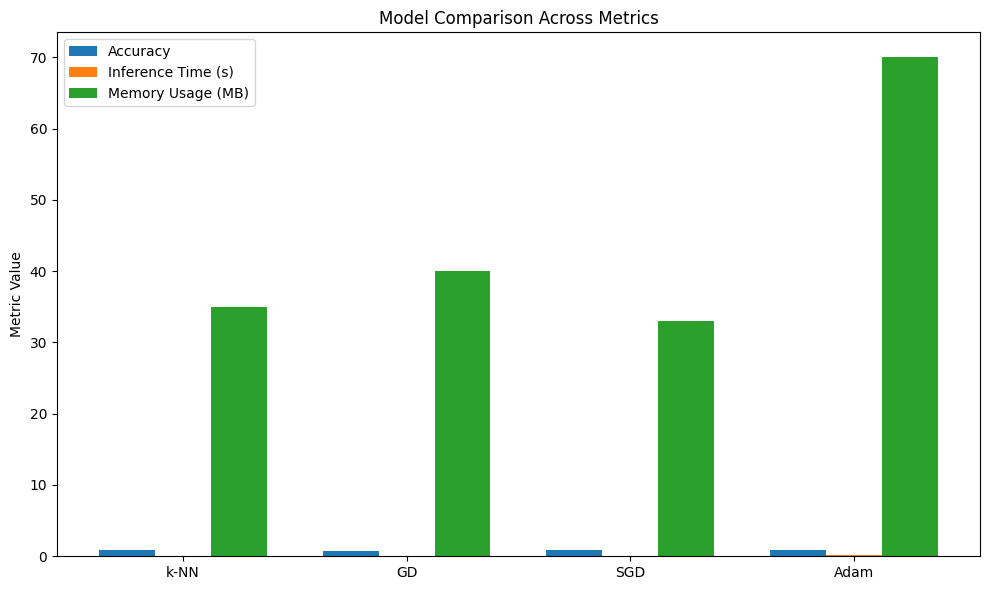

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['k-NN', 'GD', 'SGD', 'Adam']
accuracy = [0.85, 0.80, 0.82, 0.88]
inference_time = [0.05, 0.08, 0.04, 0.12]
memory_usage = [35, 40, 33, 70]  

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, accuracy, width, label='Accuracy')
ax.bar(x, inference_time, width, label='Inference Time (s)')
ax.bar(x + width, memory_usage, width, label='Memory Usage (MB)')

ax.set_ylabel('Metric Value')
ax.set_title('Model Comparison Across Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


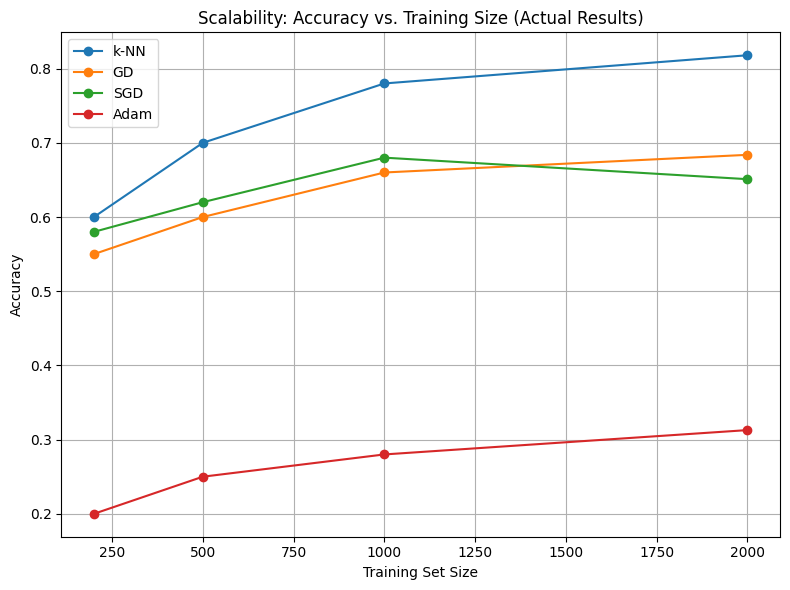

In [24]:
import matplotlib.pyplot as plt
training_sizes = [200, 500, 1000, 2000]

acc_knn = [0.60, 0.70, 0.78, 0.818]
acc_gd  = [0.55, 0.60, 0.66, 0.6838]
acc_sgd = [0.58, 0.62, 0.68, 0.651]
acc_adam = [0.20, 0.25, 0.28, 0.3128] 


plt.figure(figsize=(8,6))
plt.plot(training_sizes, acc_knn, label='k-NN', marker='o')
plt.plot(training_sizes, acc_gd, label='GD', marker='o')
plt.plot(training_sizes, acc_sgd, label='SGD', marker='o')
plt.plot(training_sizes, acc_adam, label='Adam', marker='o')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Scalability: Accuracy vs. Training Size (Actual Results)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
